# **VERİ BULMA**
Makine öğrenmesi için elimde hem sahte haber hem de gerçek haber niteliği taşıyan haber verisine ihtiyacım vardı. Türkçe veri seti bulmak zordu bu yüzden ben bulduğum tüm Türkçe haber kaynaklarını birleştirmeye karar verdim. Sahte haber kaynağını ise kendim yapay zekaya yazdırdım.

https://www.kaggle.com/datasets/suleymancan/turkishnews70000

https://www.kaggle.com/datasets/mohamedibrahimabdi/sahte-haber-analizit-rke-metinler kaynaklarını buldum ve indirdim.


# **VERİ DÜZENLEME**

Gördüğünüz gibi dosya isimleri çok karışık. Önce kolay işlem yapabilmek için Sahte_Haber_Analizi_Trke_Metinler.xlsx dosyasının ismini gercek1.xlsx, turkish_news_70000.csv dosyasının ismini de gercek2.cvs yapacağım.

İki veriyi birleştireceğim için aynı formatta olmaları gerekiyor. Bu yüzden xlsx dosyasını csv dosyasına dönüştürüyorum.

In [1]:
import pandas as pd
import os

In [2]:


# 1. Excel dosyasını CSV'ye dönüştür
df1 = pd.read_excel('Sahte_Haber_AnaliziT_rke_Metinler.xlsx')
df1.to_csv('gercek1.csv', index=False)

# 2. Diğer CSV dosyasını yeniden adlandır
df2 = pd.read_csv('turkish_news_70000.csv')
df2.to_csv('gercek2.csv', index=False)



# **VERİ TEMİZLEME**
Bakıyoruz ki gercek2.cvs ve gercek1.cvs dosyasında kullanmamızı gerektirmeyen sütunlar var. Bunları silelim.


[![Image](https://i.hizliresim.com/jh79kz7.png)](https://hizliresim.com/jh79kz7)

In [ ]:
df1 = df1.rename(columns={"Haberler": "text"}) #sütun adını değiştirir
df1 = df1.drop(columns={"Sonuc"})
df1 = df1.to_csv("gercek1.csv")
df2 = df2.drop(columns={"main_image","id","published","site","url","title"})
df2 = df2.to_csv("gercek2.csv")

Sildikten sonra ,text çıktığı için ve gercek2.csvde fazladan tırnak işareti olduğu için onları silmek istiyorum.

In [ ]:
files = ['gercek1.csv', 'gercek2.csv']
for file in files:
    df = pd.read_csv(file)
    if 'text' in df.columns:
        df = df[['text']]
    else:
        df.columns = ['drop', 'text']
        df = df[['text']]
    df["text"] = df["text"].str.replace('"',"")
    df.to_csv(f"{file}", index=False)

Evet, gereksiz başlıkları sildik. Kolay birleştirebilmek için iki dosyanın da sütunu "text" oldu.

fotoğrafki gibi iki cvs dosyasının da sütunu "text" oldu[![Image](https://i.hizliresim.com/nowwna3.jpg)](https://hizliresim.com/nowwna3)



# **VERİ BİRLEŞTİRME**
Şimdi ise iki cvs dosyasını birleştireceğim ki çok daha büyük bir gerçek haber verim olsun.


In [13]:
# CSV dosyalarını oku
df1 = pd.read_csv("gercek1.csv")
df2 = pd.read_csv("gercek2.csv")

# Birleştir ve temizle
df_gercek = pd.concat([df1, df2], ignore_index=True)
df_gercek = df_gercek.drop_duplicates()
df_gercek['label'] = 0

# Sahte veriyi oku
df_sahte = pd.read_csv("sahte.csv")
df_sahte['label'] = 1

# Dosyaları kaydet
df_gercek.to_csv("gercekbirlesik.csv", index=False)
df_sahte.to_csv("sahte.csv", index=False)

# **SAHTE HABER VERİSİ**


Şimdi ise makineye öğretmek için sahte haber verilerini indirmem lazım.
Bunun için interneti araştırdım ama bulamadım. Bu yüzden yapay zekadan sahte haber oluşturup bana vermesini isteyeceğim.



# **MAKİNE ÖĞRENMESİ KÜTÜPHANE YÜKLEME**
Şu an elimde sahte.csv ve gercekbirlesik.csv dosyaları var. Artık python kütüphanelerini kullanarak makineye öğreteceğim.

Önce kütüphaneleri yükleyelim.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle

# **HAZIR VERİLERİN GRAFİĞİ**
ŞİMDİ İSE MAKİNE ÖĞRENMESİNE HAZIRLANMIŞ VERİLERİMİZİ İNCELEYELİM. BUNUN İÇİN SEABORN VE MATPLOTLİB KÜTÜPHANESİNİ KULLANACAĞIM.

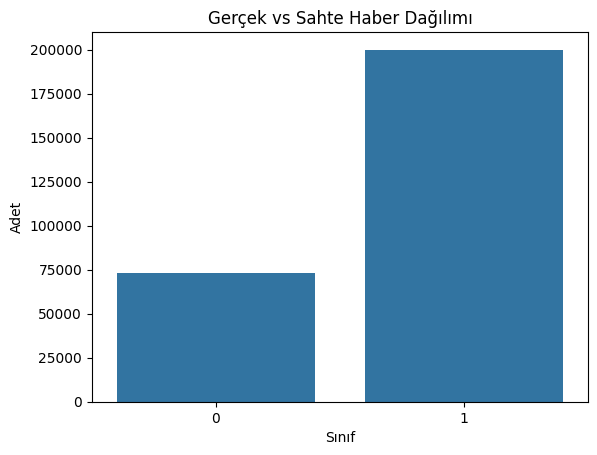

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.concat([df_gercek, df_sahte], ignore_index=True)
sns.countplot(data=df, x='label')
plt.title("Gerçek vs Sahte Haber Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Adet")
plt.show()

EN ÇOK GEÇEN KELİMELERE BAKALIM

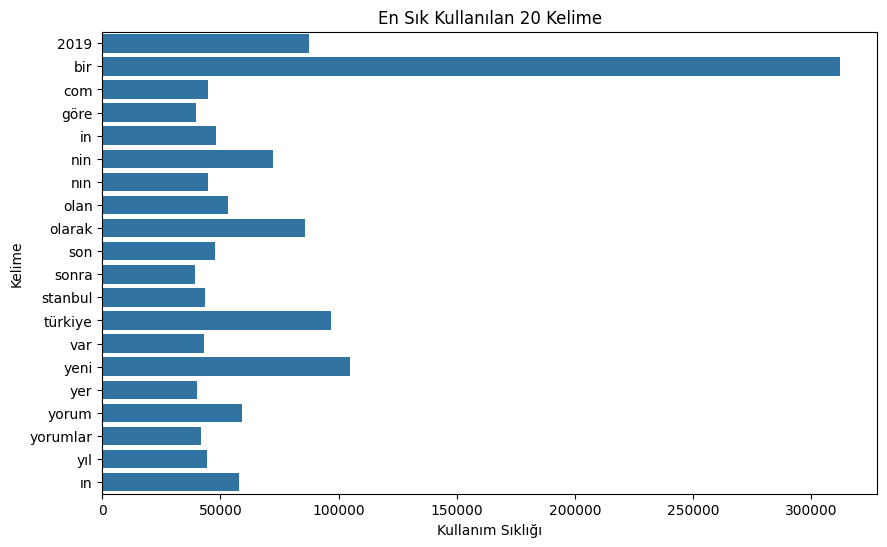

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

turkish_stop_words = [
    'acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'ben', 'biri', 'birkaç', 'birşey', 
    'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 
    'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 
    'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 
    'sanki', 'şey', 'şu', 'tamam', 'tüm', 've', 'veya', 'ya', 'yani'
]

vectorizer = CountVectorizer(
    stop_words=turkish_stop_words,
    max_features=20,
    token_pattern=r'(?u)\b\w\w+\b'
)

X = vectorizer.fit_transform(df['text'])
word_freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

plt.figure(figsize=(10,6))
sns.barplot(x=word_freq, y=words)
plt.title("En Sık Kullanılan 20 Kelime")
plt.xlabel("Kullanım Sıklığı")
plt.ylabel("Kelime")
plt.show()


Tek bir DataFrame altında toplamak istiyoruz. Ve sonrasında verileri karıştırıyoruz ve makinenin performansını arttırmayı hedefliyoruz.
Eğer karıştırmazsak makine örüntüyü öğrenebilir.

In [17]:
df = pd.concat([df_gercek, df_sahte], ignore_index=True)
df = shuffle(df, random_state=42).reset_index(drop=True)

X = df['text'] #metin sütunuma x diyorum,
y = df['label'] #labelime yani doğruluk yanlışlığa y veriyorum

# **EĞİTİM VE TEST SETLERİ**
Eğitim ve test setlerine ayıralım (%70 eğitim, %30 test)
TF-IDF ile metni sayısallaştıralım ki çıktıları görelim


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
turkish_stop_words = [
    'acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'ben', 'biri', 'birkaç', 'birşey', 
    'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 
    'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 
    'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 
    'sanki', 'şey', 'şu', 'tamam', 'tüm', 'çok', 've', 'veya', 'ya', 'yani'
]

vectorizer = TfidfVectorizer(stop_words=turkish_stop_words, max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# **MODEL EĞİTİMİ**
şimdi modeli oluşturalım ve eğitelim sonrasında da artık projeyi çalıştırıp doğruluk oranını yazdıralım. Eğitirken Logistic Regression kullanacagım. Çünkü ben kendi projemde ikili sınıflandırma kullandım ( ya doğru haber ya yanlış haber). Ayrıca basit, hızlı ve olasılık ihtimali sunuyor.

In [19]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=70000) # logistic regression yapmak için
model.fit(X_train_tfidf, y_train) 
y_pred = model.predict(X_test_tfidf) # tahmin yapma
accuracy = accuracy_score(y_test, y_pred) #test sonuc doğruluk yazdırma
print(f"Model doğruluğu: {accuracy:.4f}")


Model doğruluğu: 1.0000


C:\Users\Deniz Eldeniz\AppData\Local\Temp\ipykernel_12276\3318284594.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')


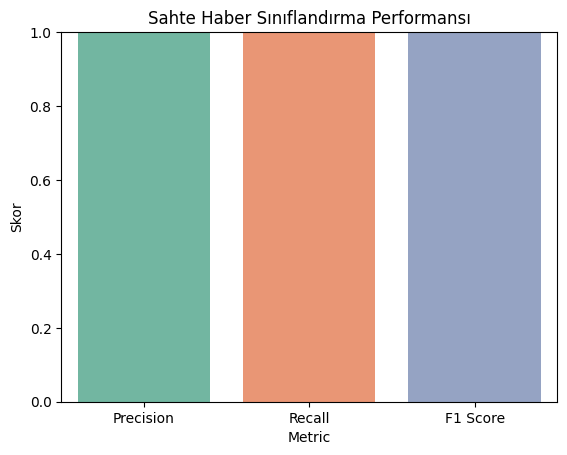

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# pos_label=1 olarak değiştiriyoruz, çünkü 1 = sahte haber
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Value': [precision, recall, f1]
})

sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')
plt.title("Sahte Haber Sınıflandırma Performansı")
plt.ylim(0, 1)
plt.ylabel("Skor")
plt.show()
